CULEX MOSQUITO DISTRIBUTION PREDICTION USING GIS APPROCH

TEAM MEMBERS:
ANIL VALLEPU and 
SAI SANDEEP ADI 
    
PROJECT GUIDE(MENTOR):
PRO.ZHENG WEI

In [1]:
pip install arcgis

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import arcgis

In [4]:
from arcgis.gis import GIS

In [5]:
gis=GIS()
map=gis.map()
map

MapView(layout=Layout(height='400px', width='100%'))

Searching for Texas state location in usa

In [6]:
myGIS=GIS()
myMap1=myGIS.map("Texas")
# myMap=myGIS.map("USA")
myMap1

MapView(layout=Layout(height='400px', width='100%'))

Search for corpus christi

In [7]:
myGIS=GIS()
# myMap=myGIS.map("Texas")
myMap2=myGIS.map("Corpus Christi ")
myMap2

MapView(layout=Layout(height='400px', width='100%'))

In [8]:
myGIS=GIS()
# myMap=myGIS.map("Texas")
myMap3=myGIS.map("Texas A&M University Corpus Christi ")
myMap3

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
myGIS=GIS()
# myMap=myGIS.map("Texas")
myMap=myGIS.map("USA")
myMap

MapView(layout=Layout(height='400px', width='100%'))

Search for USA on GIS maps

In [10]:
myGIS=GIS()
myMap=myGIS.map("USA")
myMap.basemap='dark-gray-vector'
# myMap.basemap='dark-green-vector'
myMap

MapView(layout=Layout(height='400px', width='100%'))

Now i am gonna search for "CULEX MOSQUITOES" related data Across USA using GIS

In [11]:
mosquito_search=myGIS.content.search("Culex Mosquitoes")
mosquito_search[0]

<Item title:"Manitoba West Nile Virus - SHSS Trap Count Chart" type:Dashboard owner:Manitoba_Government>

In [12]:
mosquito_search=myGIS.content.search("Culex Mosquitoes")
mosquito_search[0].id

'5bf77425451c4703ad7874458d41a370'

In [13]:
mosquito_search=myGIS.content.search("Culex Mosquitoes Spread West Nile Virus")
mosquito_search[0]

<Item title:"Mosquito Trap Sites" type:Feature Layer Collection owner:DCGISopendata>

In [14]:
mosquito_search=myGIS.content.search("Culex Mosquitoes Spread West Nile Virus")
mosquito_search[0].id

'9767d4bebd9e4559aae36785b77db901'

In [15]:
mosquito_search=myGIS.content.search("Culex Mosquitoes Spread West Nile Virus")
mosquito_search[0].id
mosquito_layer=myGIS.content.get(mosquito_search[0].id)
mosquito_layer

<Item title:"Mosquito Trap Sites" type:Feature Layer Collection owner:DCGISopendata>

Now visualize where actuallly we have more culex mosquitoes in our glob using GIS map 

In [16]:
# e52f3d87617ad462c3c9d1074dd29d95->api_key

In [17]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [18]:
import requests 
# https://home.openweathermap.org/api_keys

In [19]:
import datetime as dt
# fcb6d6b7745e37f3a39021b99da4aaab

In [48]:
base_url="http://api.openweathermap.org/data/2.5/weather?" # this is openweather home HTTP request
# api_key="e52f3d87617ad462c3c9d1074dd29d95" # This is vallepua Api key for open weather GIS
# city1="Texas" # Here i am taking weather report for texas city 
# api_key="e52f3d87617ad462c3c9d1074dd29d95"
api_key="e52f3d87617ad462c3c9d1074dd29d95"
city="Corpus Christi"
url=base_url+"appid="+api_key+"&q="+city
# response=requests .get(url).json()
response=requests .get(url).json()

In [49]:
data=response
data

{'coord': {'lon': -97.3964, 'lat': 27.8006},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 292.5,
  'feels_like': 292.08,
  'temp_min': 291.14,
  'temp_max': 293.8,
  'pressure': 1022,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 310},
 'clouds': {'all': 20},
 'dt': 1702919945,
 'sys': {'type': 2,
  'id': 2080214,
  'country': 'US',
  'sunrise': 1702905280,
  'sunset': 1702942657},
 'timezone': -21600,
 'id': 4683416,
 'name': 'Corpus Christi',
 'cod': 200}

In [50]:
import numpy as np
import pandas as pd
import json
# import matplotlib as plt

In [51]:
df = pd.json_normalize(data)
         
df.head(5)

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000,1702919945,-21600,4683416,Corpus Christi,200,-97.3964,27.8006,...,1022,61,4.63,310,20,2,2080214,US,1702905280,1702942657


In [52]:
df.columns

Index(['weather', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord.lon', 'coord.lat', 'main.temp', 'main.feels_like',
       'main.temp_min', 'main.temp_max', 'main.pressure', 'main.humidity',
       'wind.speed', 'wind.deg', 'clouds.all', 'sys.type', 'sys.id',
       'sys.country', 'sys.sunrise', 'sys.sunset'],
      dtype='object')

In [25]:
len(df) #that means we have one row

1

In [26]:
df["timezone"]

0    10800
Name: timezone, dtype: int64

In [27]:
df["weather"]

0    [{'id': 804, 'main': 'Clouds', 'description': ...
Name: weather, dtype: object

In [28]:
df["main.temp_min"]

0    296.46
Name: main.temp_min, dtype: float64

In [29]:
df["main.temp_max"].max()

298.18

In [30]:
import matplotlib as plt #importing required library
from matplotlib import pyplot as plt

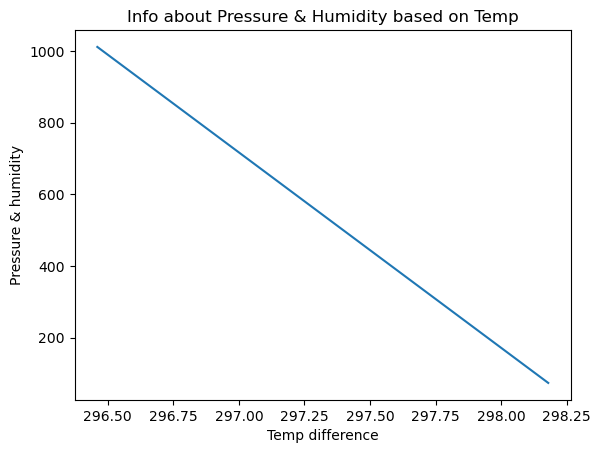

In [31]:
x=df["main.temp_min"],df["main.temp_max"]
y=df["main.pressure"],df["main.humidity"]
plt.plot(x,y) #set X-axis & Y-axise values
plt.title("Info about Pressure & Humidity based on Temp")
plt.xlabel("Temp difference")
plt.ylabel("Pressure & humidity")
plt.show() #showing output 
# x,y

Now visualize where actuallly we have more culex mosquitoes in our glob using GIS map

In [46]:
mosquito_search=myGIS.content.search("Culex Mosquitoes Spread West Nile Virus")
mosquito_search[0].id
mosquito_layer=myGIS.content.get(mosquito_search[0].id)
myMap.add_layer(mosquito_layer)
myMap

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [33]:
mosquito_search1=myGIS.content.search("Culex Mosquitoes Spread West Nile Virus")
mosquito_search1[0].id
new9=myGIS.content.get(mosquito_search1[0].id)
myMap.add_layer(new9)
myMap

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

MAXINT TOOL

In [34]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [35]:
from scipy.stats import entropy as en

In [36]:
df.columns

Index(['weather', 'base', 'visibility', 'dt', 'timezone', 'id', 'name', 'cod',
       'coord.lon', 'coord.lat', 'main.temp', 'main.feels_like',
       'main.temp_min', 'main.temp_max', 'main.pressure', 'main.humidity',
       'main.sea_level', 'main.grnd_level', 'wind.speed', 'wind.deg',
       'wind.gust', 'clouds.all', 'sys.type', 'sys.id', 'sys.country',
       'sys.sunrise', 'sys.sunset'],
      dtype='object')

In [47]:
input_for_max_entropy=df[["timezone","main.temp","main.pressure","main.humidity","wind.speed","sys.sunrise","sys.sunset"]]
input_for_max_entropy

,timezone,main.temp,main.pressure,main.humidity,wind.speed,sys.sunrise,sys.sunset
0,10800,296.46,1011,74,2.82,1702869571,1702913906


In [38]:
import pandas as pd

In [39]:
input_for_max_entropy.iloc[:1]

,timezone,main.temp,main.pressure,main.humidity,wind.speed,sys.sunrise,sys.sunset
0,10800,296.46,1011,74,2.82,1702869571,1702913906


In [40]:
inputs=[10800,292.98,1014,90,1.74,1702696716,1702741048]
inputs

[10800, 292.98, 1014, 90, 1.74, 1702696716, 1702741048]

In [41]:
inputs=pd.Series(inputs)
inputs

0    1.080000e+04
1    2.929800e+02
2    1.014000e+03
3    9.000000e+01
4    1.740000e+00
5    1.702697e+09
6    1.702741e+09
dtype: float64

In [42]:
inputs.value_counts()

1.080000e+04    1
2.929800e+02    1
1.014000e+03    1
9.000000e+01    1
1.740000e+00    1
1.702697e+09    1
1.702741e+09    1
Name: count, dtype: int64

NOW FIND THE MAXENT->MAXIMUM ENTROPY

In [43]:
maxent=en(inputs.value_counts())
maxent

1.945910149055313

In [44]:
myGIS=GIS()
# myMap=myGIS.map("Texas")
myMap3=myGIS.map("Texas A&M University Corpus Christi",maxent)
myMap3

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
mosquito_search1=myGIS.content.search("Culex Mosquitoes Spread West Nile Virus")
mosquito_search1[0].id
new9=myGIS.content.get(mosquito_search1[0].id)
myMap.add_layer(new9)
myMap

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [35]:
pip install json2excel

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install Json2Excel

Note: you may need to restart the kernel to use updated packages.


In [37]:
base_url="http://api.openweathermap.org/data/2.5/weather?" # this is openweather home HTTP request
api_key="fcb6d6b7745e37f3a39021b99da4aaab" # This is my Api key for open weather GIS
city="Texas" # Here i am taking weather report for texas city 

def kel_cel_fahrenheit(kelvin):
    celsius=kelvin-273.15
    fahrenheit=celsius*(9/5)+32
    return celsius,fahrenheit

url=base_url+"appid="+api_key+"&q="+city
# response=requests .get(url).json()
response=requests .get(url).json()

temp_kel=response ['main']['temp']
temp_celsius,temp_fahrenheit=kel_cel_fahrenheit(temp_kel)
feels_like_kelvin=response['main']['feels_like']
feels_like_celsius,feels_like_fahrenheit=kel_cel_fahrenheit(feels_like_kelvin)
wind_speed=response['wind']['speed']
humidity=response['main']['humidity']
description=response['weather'][0]['description'] 
sunrise_time=dt.datetime.utcfromtimestamp(response['sys']['sunrise']+response['timezone'])
sunset_time=dt.datetime.utcfromtimestamp(response['sys']['sunset']+response['timezone'])

print(f"temp in {city}: {temp_celsius:.2f}.C or {temp_fahrenheit} F")
print(f"temp in {city} feels_like: {feels_like_celsius:.2f}.C or {feels_like_fahrenheit}.F")
print(f"humidity in {city}: {humidity}%")
print(f"wind speed in {city}: {wind_speed}m/s")
print(f"general weather in {city}: {description}")
print(f"sunrise in {city} at {sunrise_time} local time")
print(f"sunset in {city} at {sunset_time} local time")


temp in Texas: 14.78.C or 58.604000000000056 F
temp in Texas feels_like: 13.07.C or 55.526000000000096.F
humidity in Texas: 29%
wind speed in Texas: 1.54m/s
general weather in Texas: clear sky
sunrise in Texas at 2023-12-03 07:19:40 local time
sunset in Texas at 2023-12-03 17:34:13 local time


DONE BY,

ANIL VALLEPU

SAI SANDEEP ADI

MS IN DATA SCIENCE